In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Crop Production data.csv')


In [2]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values
data = data.dropna()

# Convert data types if necessary
# data['Column_Name'] = data['Column_Name'].astype('desired_dtype')

# Normalize or standardize data if necessary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))


State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [6]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (for simplicity, we'll drop them)
data = data.dropna()

# Convert data types if necessary (ensure numeric columns are in the correct format)
data['Crop_Year'] = data['Crop_Year'].astype(int)
data['Area'] = data['Area'].astype(float)
data['Production'] = data['Production'].astype(float)


State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Production
plt.figure(figsize=(10,6))
sns.histplot(data['Production'], kde=True)
plt.title('Distribution of Crop Production')
plt.show()

# Crop Production over Years
plt.figure(figsize=(14,7))
sns.lineplot(x='Crop_Year', y='Production', data=data)
plt.title('Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()

# Production by Season
plt.figure(figsize=(14,7))
sns.boxplot(x='Season', y='Production', data=data)
plt.title('Crop Production by Season')
plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('Crop Production data.csv')

# Data Preprocessing
data = data.dropna()
data['Crop_Year'] = data['Crop_Year'].astype(int)
data['Area'] = data['Area'].astype(float)
data['Production'] = data['Production'].astype(float)

# Select features and target variable
X = data[['Crop_Year', 'Area']]
y = data['Production']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy_percentage = r2 * 100

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f'Accuracy Percentage: {accuracy_percentage}%')

# Additional: Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 401500837552061.3
R² Score: 0.00208025972940562
Accuracy Percentage: 0.20802597294056202%
Root Mean Squared Error: 20037485.809154335


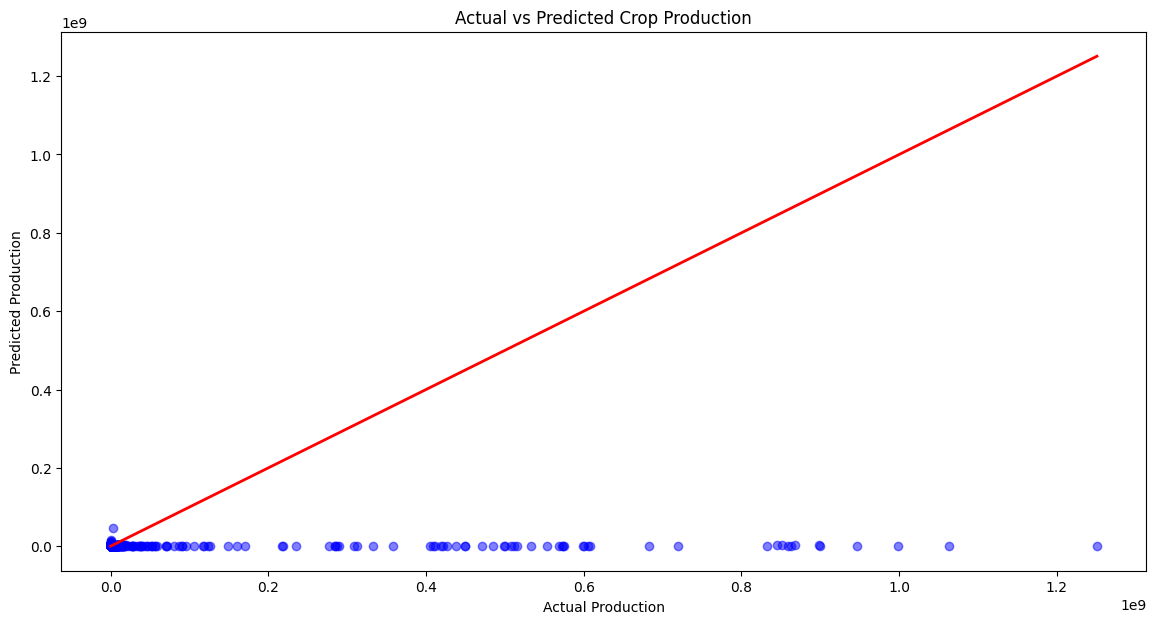

In [12]:
# Plotting the actual vs predicted values
plt.figure(figsize=(14,7))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Crop Production')
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.show()
